Datasets can be downloaded from [here](https://www.dropbox.com/sh/yqlclftyolwqy7y/AADVD-_IOqpXQx8PlWcywMypa?dl=0)  
**Datasets have been normalized.**

Ref: Olsson, A. et al. Single-cell analysis of mixed-lineage states leading to a binary cell fate choice. Nature (2016).

In [1]:
!python --version

Python 3.7.12


In [1]:
import stream as st
import scanpy
import numpy as np
import scipy
import pandas as pd
from matplotlib import pyplot as plt
import os
from pandas.plotting import table 
st.__version__

/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:17: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import Index as PandasIndex


'1.0'

In [2]:
## Load in preprocessed reference stream object (so far only nsclc)
analysis_name = "cd8_nsclc"
adata=st.read('./stream_result/stream_result_forMapping_' + analysis_name + '.pkl')
figure_dir="figures/STREAM/" + analysis_name
if not os.path.isdir(figure_dir):
    os.mkdir(figure_dir)

Working directory is already specified as './stream_result' 
To change working directory, please run set_workdir(adata,workdir=new_directory)


In [24]:
## Load in merged cd8 glioma/melanoma object
gm_adata=scanpy.read_h5ad("analysis/STREAM/cd8_glioma.melanoma.h5ad")
st.set_workdir(gm_adata,'./stream_result')
gm_adata.var_names_make_unique()
gm_adata.X=gm_adata.X.toarray()

Saving results in: ./stream_result


In [5]:
## NOT USED
## Load in anndata for glioma and melanoma
## glioma
glioma_adata=scanpy.read_h5ad("analysis/STREAM/cd8.h5ad")
st.set_workdir(glioma_adata,'./stream_result')
glioma_adata.var_names_make_unique()
glioma_adata.X=glioma_adata.X.toarray()

## melanoma
melanoma_adata=scanpy.read_h5ad("analysis/STREAM/cd8_melanoma.h5ad")
st.set_workdir(melanoma_adata,'./stream_result')
melanoma_adata.var_names_make_unique()
melanoma_adata.X=melanoma_adata.X.toarray()

Saving results in: ./stream_result
Saving results in: ./stream_result


In [26]:
## Rename columns so they vary between adata and adata_new
#glioma_adata.var.columns = 'glioma_'+glioma_adata.var.columns
#melanoma_adata.var.columns = 'melanoma_'+melanoma_adata.var.columns
gm_adata.var.columns = 'gm_'+gm_adata.var.columns

In [27]:
gm_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,RNA_snn_res.0.8,seurat_clusters,age_numeric,cellAnnot,NiceSubtype,TumorType,cytotoxic1,naive2,predysfunctional3,dysfunctional4,maxGeneset,maxGeneset_score,maxGeneset_lowScore,maxGeneset_byTumor,Annot,Tumor_Age
MGH207_P4_G06,0,999999.97,1876,MGH207,1,1,37.9,Memory,IDH-G,Glioma,-1.039244,1.452267,0.584093,-0.607830,naive2,1.452267,naive,naive_Glioma,Memory,Glioma_Adult
E_42_P4_B03_E42_CD4.CD8._P3P4P5P6,0,1000000.09,585,E42,9,9,46.8,Stress,IDH-G,Glioma,0.030756,-0.247483,-0.744188,-0.280109,cytotoxic1,0.030756,ScoreTooLow,ScoreTooLow_Glioma,Stress,Glioma_Adult
E_42_P4_G01_E42_CD4.CD8._P3P4P5P6,0,999999.79,1501,E42,0,0,46.8,Memory,IDH-G,Glioma,-0.412575,-0.227893,-1.781393,-0.556520,naive2,-0.227893,ScoreTooLow,ScoreTooLow_Glioma,Memory,Glioma_Adult
E60_P3_A05_E48.2_CD4.CD8._P3P4,0,999999.94,621,E48.2,1,1,25.9,Predysfunctional,IDH-G,Glioma,0.188538,-0.099309,1.385253,-0.245025,predysfunctional3,1.385253,predysfunctional,predysfunctional_Glioma,Predysfunctional,Glioma_Adult
E60_P4_D12_E48.2_CD4.CD8._P3P4,0,999999.86,621,E48.2,1,1,25.9,Memory,IDH-G,Glioma,-0.670281,-0.140756,-1.132955,-0.432355,naive2,-0.140756,ScoreTooLow,ScoreTooLow_Glioma,Memory,Glioma_Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_1__S25_comb,0,1000000.00,5447,Sample75,1,1,NA,M2,Melanoma,Melanoma,-1.116244,1.411550,-1.309691,-0.194378,naive2,1.411550,naive,naive_Melanoma,naive2,Melanoma
CY75_1_CD45_CD8_7__S223_comb,0,1000000.00,5385,Sample75,1,1,NA,M0,Melanoma,Melanoma,0.241656,-1.222755,0.265738,1.434478,dysfunctional4,1.434478,dysfunctional,dysfunctional_Melanoma,dysfunctional4,Melanoma
CY75_1_CD45_CD8_1__S65_comb,0,1000000.00,4769,Sample75,0,0,NA,M3,Melanoma,Melanoma,-0.797614,-0.254081,0.511981,1.870131,dysfunctional4,1.870131,dysfunctional,dysfunctional_Melanoma,dysfunctional4,Melanoma
CY75_1_CD45_CD8_1__S93_comb,0,1000000.00,4727,Sample75,2,2,NA,M3,Melanoma,Melanoma,0.120214,-1.245862,-0.962369,0.554723,dysfunctional4,0.554723,dysfunctional,dysfunctional_Melanoma,dysfunctional4,Melanoma


In [29]:
## add on annotation column: all clusters
adata.obs['Annot']=adata.obs["majorCluster"]

## add on annotation column: annotation for glioma only
adata.obs['Annot_ref']="ref"
gm_adata.obs['Annot_ref']=gm_adata.obs["Annot"]

## Add on "age" to nsclc (ref)
adata.obs['Tumor_Age']="NSCLC"

In [30]:
adata_combined = st.map_new_data(adata,gm_adata)

Top variable genes are being used for mapping ...
method 'mlle' is being used for mapping ...
Visualizing new cells on 2D plane ...
Using the manifold from `plot_visualization_2D()` 


/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


#### Merge into single object

/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/ipykernel_launcher.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/contextlib.py:119: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  next(self.gen)


In [172]:
adata_combined = st.map_new_data(adata,adata_new)

Top variable genes are being used for mapping ...
method 'mlle' is being used for mapping ...
Visualizing new cells on 2D plane ...
Using the manifold from `plot_visualization_2D()` 


/Users/jlabelle/opt/anaconda3/envs/stream/lib/python3.7/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


In [31]:
type(adata_combined.obs.head())
for col in adata_combined.obs.columns:
    print(col)

orig.ident
nCount_RNA
nFeature_RNA
sample
RNA_snn_res.0.8
seurat_clusters
age_numeric
Annot
Tumor_Age
Annot_ref
node
branch_id
branch_id_alias
branch_lam
branch_dist
S0_pseudotime
S3_pseudotime
S4_pseudotime
S2_pseudotime
S1_pseudotime
S7_pseudotime
S6_pseudotime
S5_pseudotime
batch


In [34]:
### add new labels to highlight the new data
adata_combined.obs['label_new'] = ''
adata_combined.obs.loc[adata.obs_names+'-ref','label_new'] = 'ref'
adata_combined.obs.loc[adata_new.obs_names+'-new','label_new'] = 'new'
#adata_combined.uns['label_new_color'] = {'ref':'gray',**adata_new.uns['label_color']}
adata_combined.uns['label_new_color'] = {'ref':'gray'}


NameError: name 'adata_new' is not defined

In [35]:
adata_combined.uns['Tumor_Age_color'] = {'NSCLC':'gray','Melanoma':'green', 'Glioma_Ped':'red', 'Glioma_Adult':'blue'}

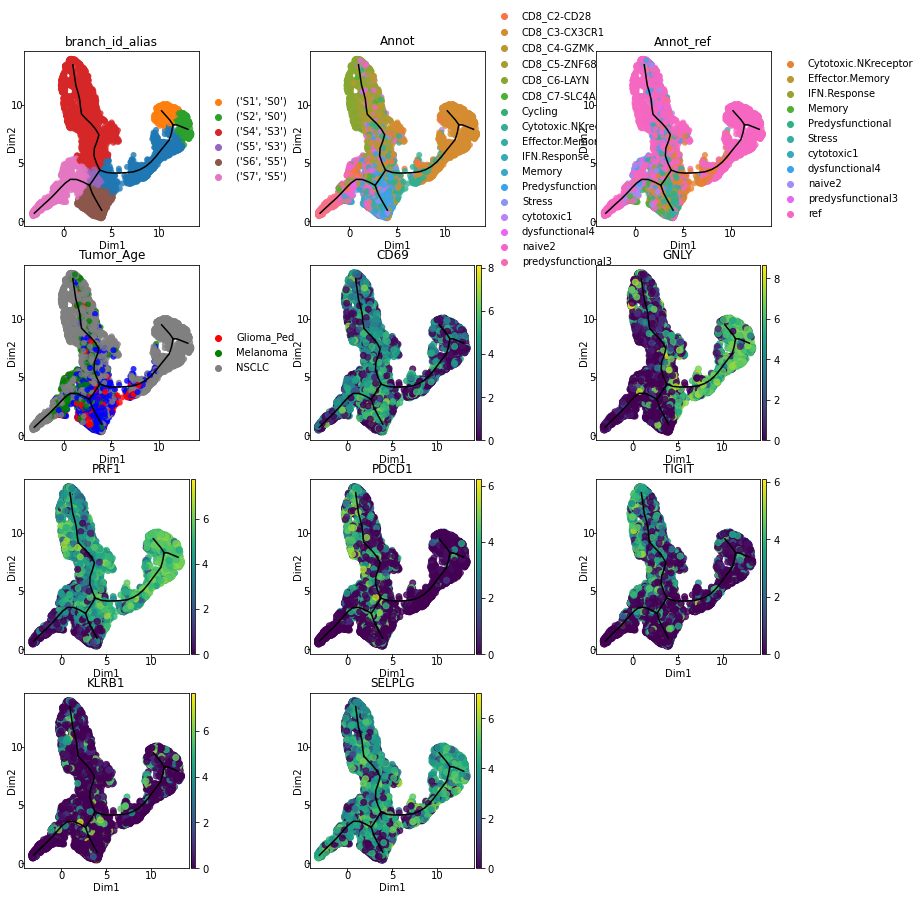

In [39]:
## since we learnt graph on visualization manifold, the dimension reduction plot will be the same as the visualization plot
st.plot_dimension_reduction(adata_combined,color=['branch_id_alias', 'Annot', 'Annot_ref', 'Tumor_Age',
                                                  "CD69", "GNLY","PRF1", "PDCD1", "TIGIT", "KLRB1","SELPLG"],show_graph=True,show_text=False)
figure = plt.gcf()

figure.set_size_inches(12, 12)
plt.savefig(figure_dir + "/glioma.melanomaMap_trajectory_flat.png", dpi=600)

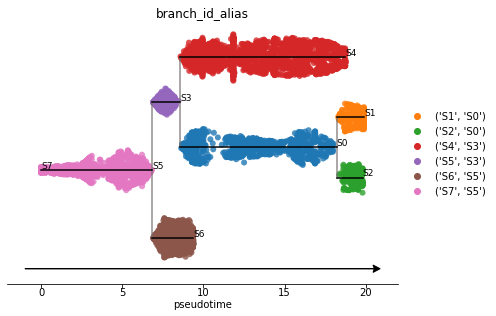

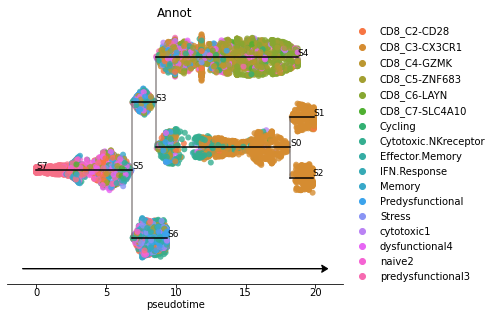

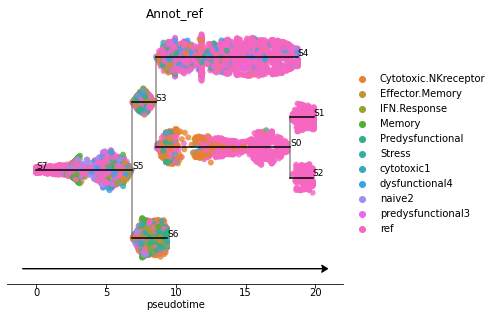

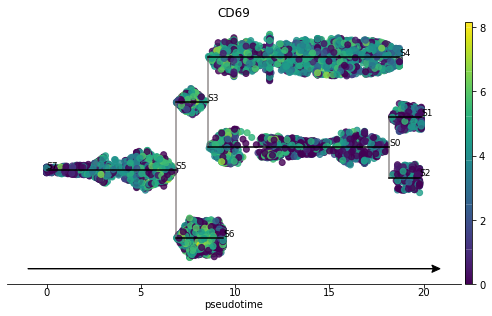

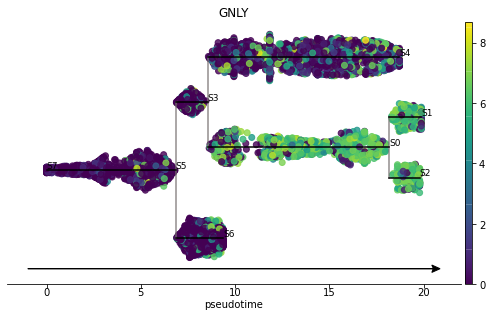

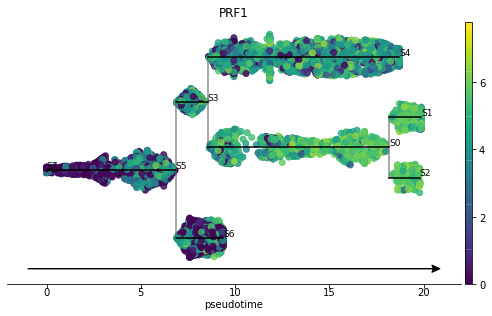

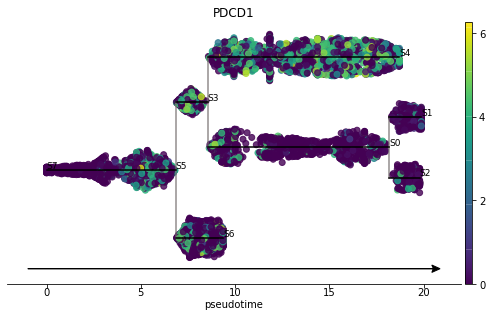

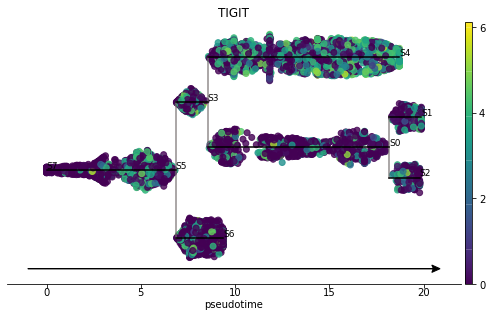

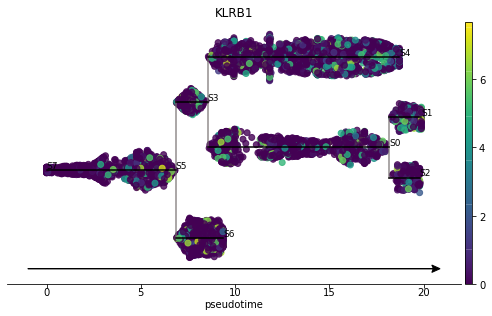

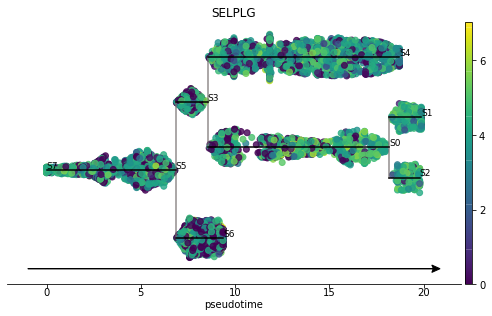

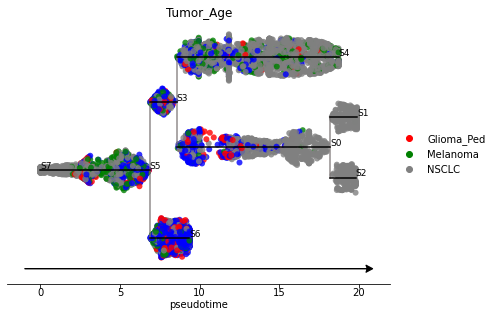

In [40]:
st.plot_stream_sc(adata_combined,root='S7',color=['branch_id_alias', 'Annot', 'Annot_ref', 
                                                  "CD69", "GNLY","PRF1", "PDCD1", "TIGIT", "KLRB1","SELPLG",'Tumor_Age'],
                  dist_scale=0.5,show_graph=True,show_text=True)

In [25]:
## Set analysis name- for reading/writing data
analysis_name="cd8"

## Load h5ad object (from seurat)
filename="analysis/STREAM/" + analysis_name + ".h5ad"
adata_new = scanpy.read_h5ad(filename)
#st.set_workdir(adata_new,'./stream_result')

## Make variable names unique
adata_new.var_names_make_unique()

## Convert to array
adata_new.X=adata_new.X.toarray()

## Calculate QC metrics
#sbt.cal_qc(adata_new,assay='rna')

###Remove mitochondrial genes 
#st.remove_mt_genes(adata_new)
#st.add_cell_labels(adata_new,file_name='./cell_perturbation_label.tsv')
#st.add_cell_colors(adata_new,file_name='./cell_perturbation_label_color.tsv')

#### Subset to individual datasets (excluding ref)

In [ ]:
## Subset to individual datasets (excluding ref)
adata_combined_gm = adata_combined[np.isin(adata_combined.obs.Tumor_Age,['Glioma_Ped','Glioma_Adult', 'Melanoma'])].copy()

In [104]:
adata_combined_gm.obs["Nature2020MaxScore"]=gm_adata.obs["cellAnnot"]


array([nan], dtype=object)

In [102]:
gm_adata.obs['column'] = gm_adata.obs['maxGeneset'].astype('|S')
gm_adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,sample,RNA_snn_res.0.8,seurat_clusters,age_numeric,cellAnnot,NiceSubtype,TumorType,...,branch_dist,S0_pseudotime,S3_pseudotime,S4_pseudotime,S2_pseudotime,S1_pseudotime,S7_pseudotime,S6_pseudotime,S5_pseudotime,column
MGH207_P4_G06,0,999999.97,1876,MGH207,1,1,37.9,Memory,IDH-G,Glioma,...,0.837956,13.712267,4.066867,14.243483,15.312560,15.401004,9.227668,0.128690,2.373573,b'naive2'
E_42_P4_B03_E42_CD4.CD8._P3P4P5P6,0,1000000.09,585,E42,9,9,46.8,Stress,IDH-G,Glioma,...,0.944929,13.582488,3.937088,14.113704,15.182781,15.271225,9.097889,0.258469,2.243794,b'cytotoxic1'
E_42_P4_G01_E42_CD4.CD8._P3P4P5P6,0,999999.79,1501,E42,0,0,46.8,Memory,IDH-G,Glioma,...,0.962600,13.121500,3.476100,13.652716,14.721793,14.810237,8.636901,0.719457,1.782806,b'naive2'
E60_P3_A05_E48.2_CD4.CD8._P3P4,0,999999.94,621,E48.2,1,1,25.9,Predysfunctional,IDH-G,Glioma,...,0.948055,13.674055,4.028656,14.205272,15.274349,15.362792,9.189457,0.166901,2.335362,b'predysfunctional3'
E60_P4_D12_E48.2_CD4.CD8._P3P4,0,999999.86,621,E48.2,1,1,25.9,Memory,IDH-G,Glioma,...,0.857535,13.645972,4.000573,14.177189,15.246266,15.334709,9.161374,0.194984,2.307279,b'naive2'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CY75_1_CD45_CD8_1__S25_comb,0,1000000.00,5447,Sample75,1,1,NA,M2,Melanoma,Melanoma,...,1.219977,13.419579,3.774179,13.950795,15.019872,15.108316,4.773210,4.583148,2.080885,b'naive2'
CY75_1_CD45_CD8_7__S223_comb,0,1000000.00,5385,Sample75,1,1,NA,M0,Melanoma,Melanoma,...,0.115331,11.466763,1.821364,11.997980,13.067057,13.155500,6.982165,2.374193,0.128070,b'dysfunctional4'
CY75_1_CD45_CD8_1__S65_comb,0,1000000.00,4769,Sample75,0,0,NA,M3,Melanoma,Melanoma,...,0.053033,11.877479,2.232080,12.408696,13.477773,13.566216,7.392881,1.963477,0.538786,b'dysfunctional4'
CY75_1_CD45_CD8_1__S93_comb,0,1000000.00,4727,Sample75,2,2,NA,M3,Melanoma,Melanoma,...,0.531484,11.887428,2.242028,12.418644,13.487721,13.576165,7.402829,1.953529,0.548734,b'dysfunctional4'


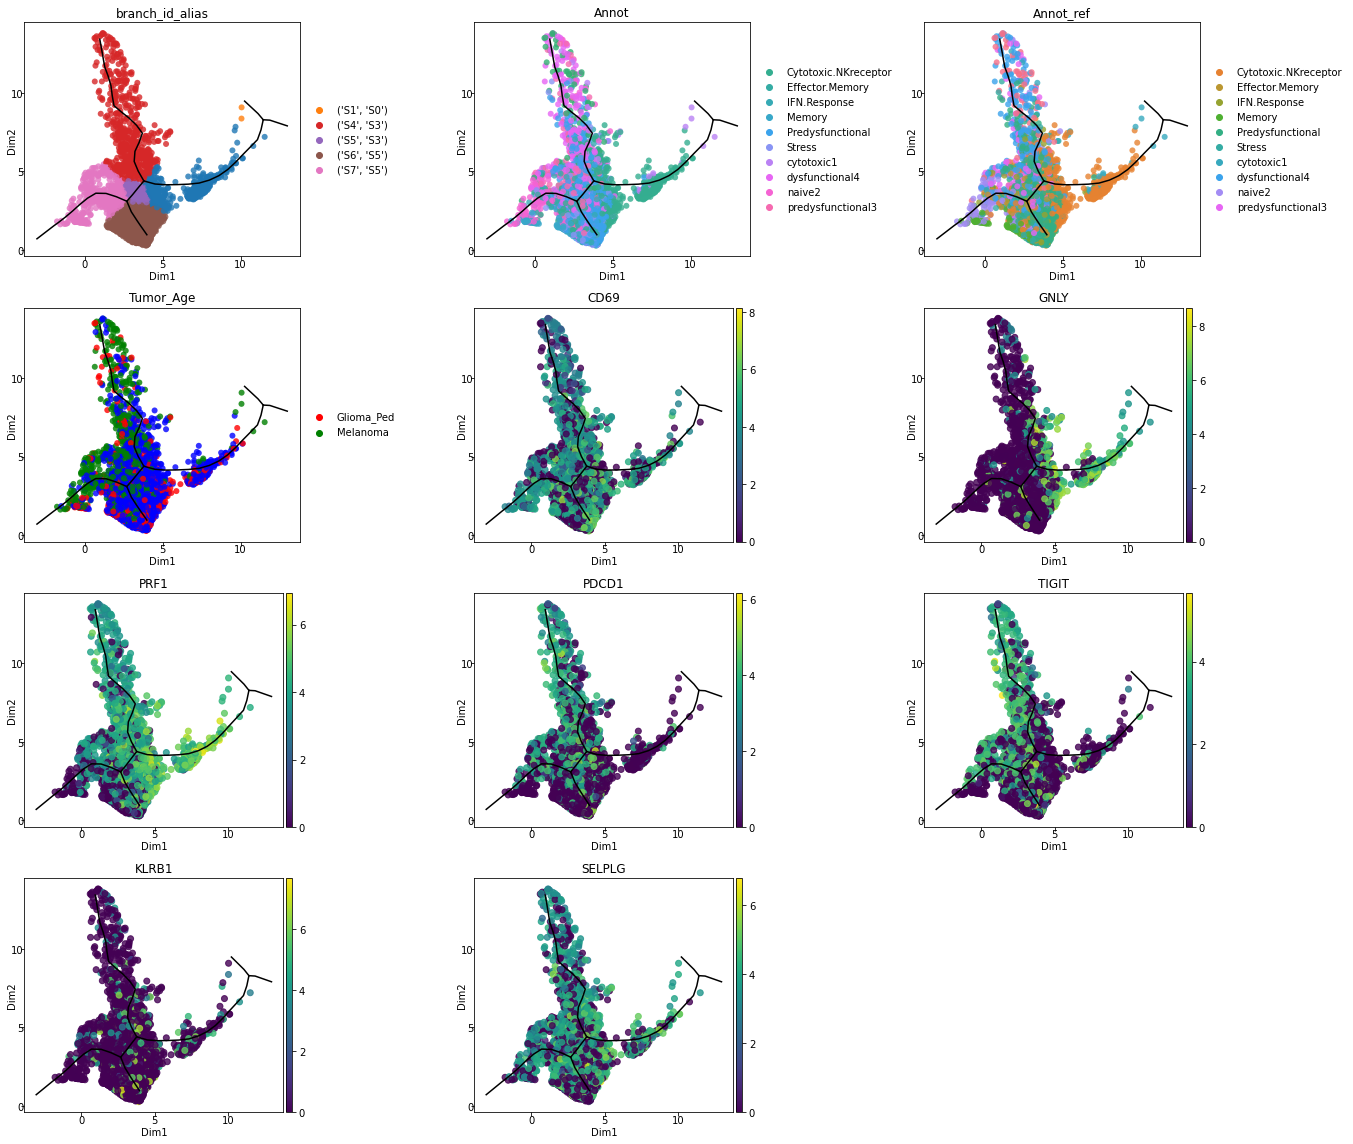

In [84]:
## Plot
st.plot_dimension_reduction(adata_combined_gm,color=['branch_id_alias', 'Annot', 'Annot_ref', 'Tumor_Age',
                                                  "CD69", "GNLY","PRF1", "PDCD1", "TIGIT", "KLRB1","SELPLG"],show_graph=True,show_text=False)
#figure = plt.gcf()

#figure.set_size_inches(12, 12)
#plt.savefig(figure_dir + "/glioma.melanomaMap_trajectory_flat.png", dpi=600)

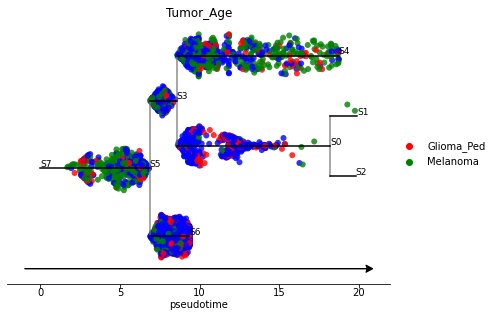

In [50]:
st.plot_stream_sc(adata_combined_gm,root='S7',color=['Tumor_Age'],
                  dist_scale=0.5,show_graph=True,show_text=True)

In [48]:
np.unique(adata_combined_gm.obs.Tumor_Age)

array(['Glioma_Adult', 'Glioma_Ped', 'Melanoma'], dtype=object)

> Here the input datasets have been normalized. So we skipped the normalization step. For new datasets with raw counts, please exectute:
```python
st.normalize(adata_new,method='lib_size')
st.log_transform(adata_new)
st.remove_mt_genes(adata_new)
```

In [51]:
adata_combined = st.map_new_data(adata_sharedGenes,adata_new_sharedGenes)

Top variable genes are being used for mapping ...


ValueError: variable gene 'MIR4761' does not exist in `adata_new.var_names`

In [25]:
adata_combined.obs.head()

,label,node,branch_id,branch_id_alias,branch_lam,branch_dist,S0_pseudotime,S5_pseudotime,S2_pseudotime,S4_pseudotime,S1_pseudotime,S3_pseudotime,batch
Lsk.3-ref,HSCP-1,16,"(46, 24)","(S4, S3)",1.409787,0.471586,7.588585,5.533692,15.282413,1.409787,12.567314,1.990208,ref
Lsk.80-ref,HSCP-1,46,"(46, 24)","(S4, S3)",0.060020,0.034544,8.938352,6.883459,16.632180,0.060020,13.917081,3.339975,ref
Lsk.81-ref,HSCP-1,42,"(46, 24)","(S4, S3)",0.478269,0.170355,8.520102,6.465209,16.213931,0.478269,13.498832,2.921726,ref
Lsk.65-ref,HSCP-1,46,"(46, 24)","(S4, S3)",0.000000,0.135069,8.998371,6.943479,16.692200,0.000000,13.977101,3.399995,ref
Lsk.16-ref,HSCP-1,42,"(46, 24)","(S4, S3)",0.423643,0.014282,8.574728,6.519835,16.268557,0.423643,13.553457,2.976351,ref


In [26]:
### add new labels to highlight the new data
adata_combined.obs['label_new'] = ''
adata_combined.obs.loc[adata.obs_names+'-ref','label_new'] = 'ref'
adata_combined.obs.loc[adata_new.obs_names+'-new','label_new'] = adata_combined.obs.loc[adata_new.obs_names+'-new','label']
adata_combined.uns['label_new_color'] = {'ref':'gray',**adata_new.uns['label_color']}

In [27]:
adata_combined

AnnData object with n_obs × n_vars = 570 × 12445
    obs: 'label', 'node', 'branch_id', 'branch_id_alias', 'branch_lam', 'branch_dist', 'S0_pseudotime', 'S5_pseudotime', 'S2_pseudotime', 'S4_pseudotime', 'S1_pseudotime', 'S3_pseudotime', 'batch', 'label_new'
    uns: 'workdir', 'epg', 'flat_tree', 'label_color', 'var_genes', 'vis_trans_umap', 'label_new_color'
    obsm: 'var_genes', 'X_dr', 'X_vis_umap'

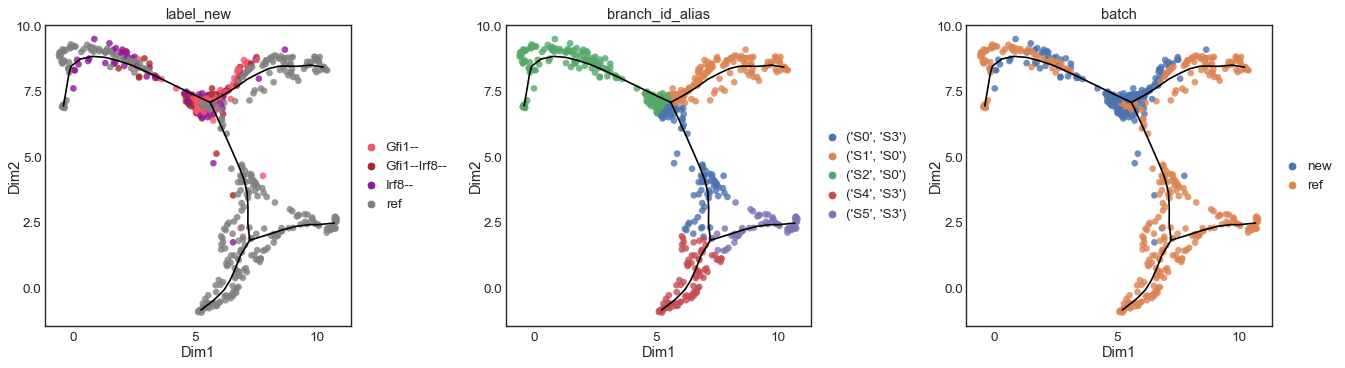

In [28]:
## since we learnt graph on visualization manifold, the dimension reduction plot will be the same as the visualization plot
st.plot_dimension_reduction(adata_combined,color=['label_new','branch_id_alias','batch'],show_graph=True,show_text=False)

Importing precomputed umap visualization ...


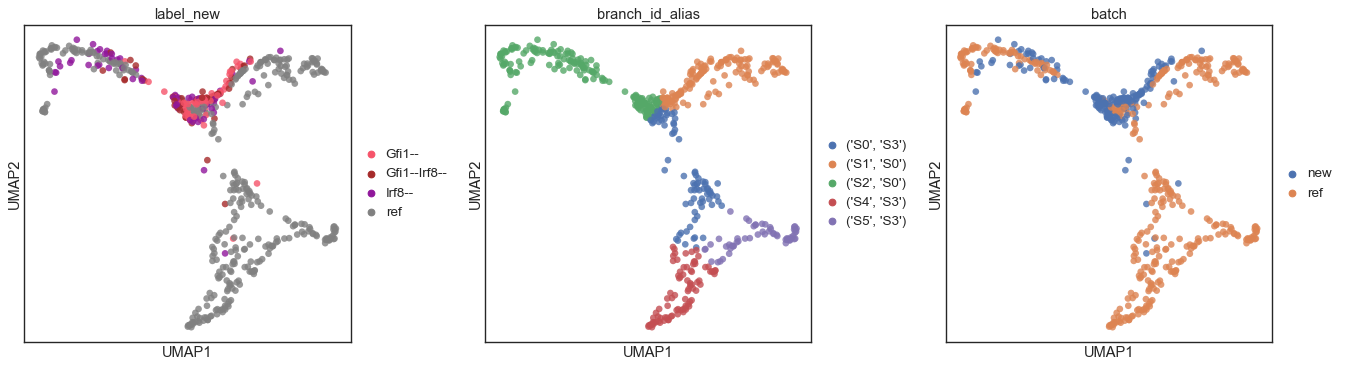

In [29]:
st.plot_visualization_2D(adata_combined,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

Importing precomputed umap visualization ...


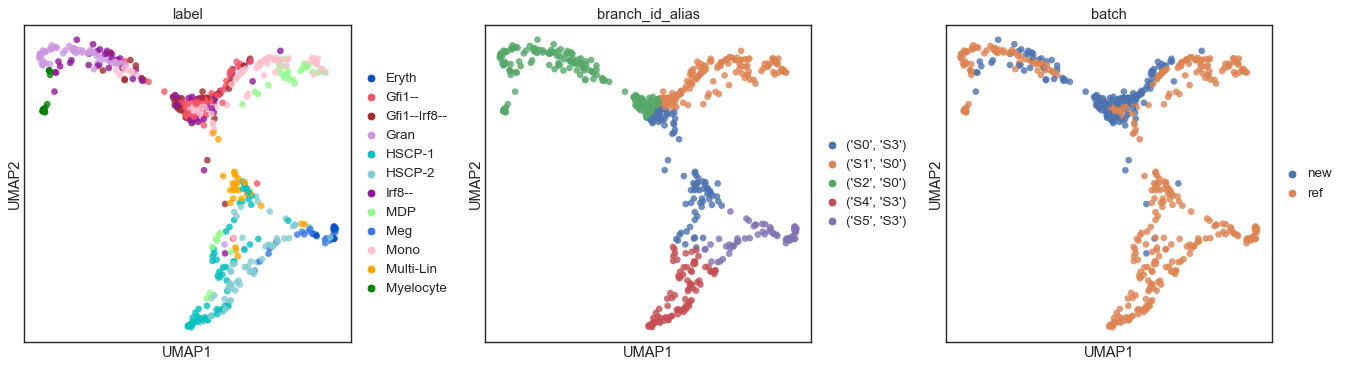

In [30]:
st.plot_visualization_2D(adata_combined,n_neighbors=30,color=['label','branch_id_alias','batch'],fig_ncol=4)

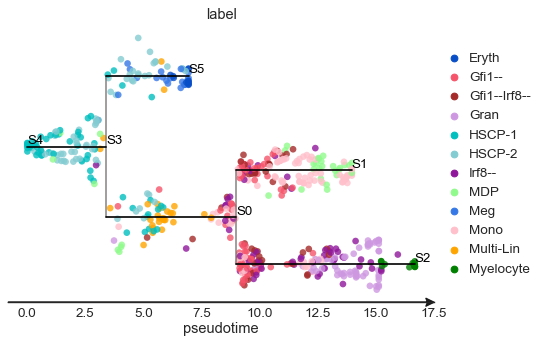

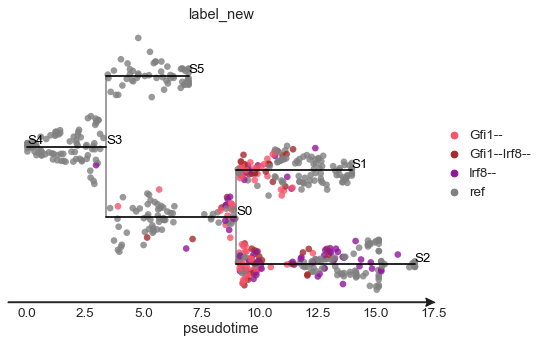

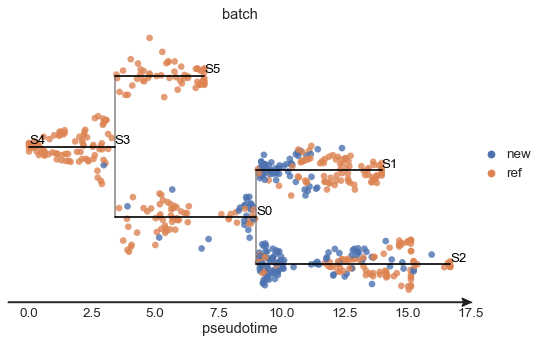

In [31]:
st.plot_stream_sc(adata_combined,root='S4',color=['label','label_new','batch'],
                  dist_scale=0.5,show_graph=True,show_text=True)

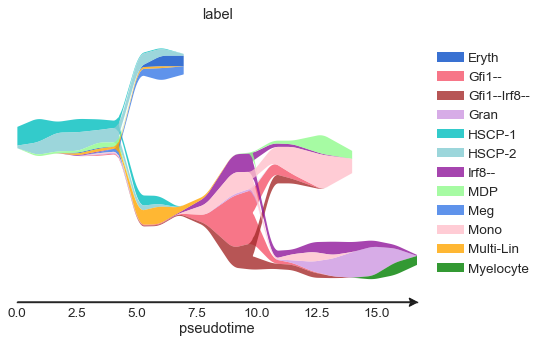

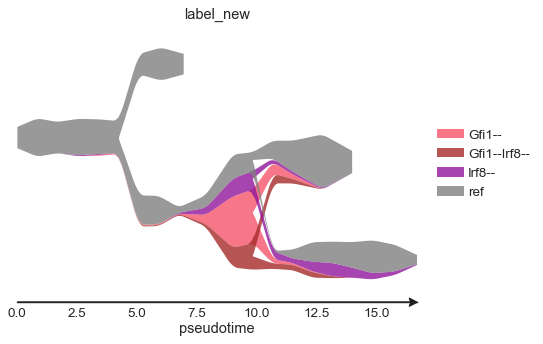

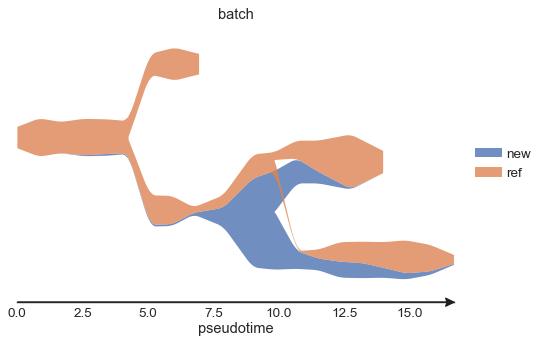

In [32]:
st.plot_stream(adata_combined,root='S4',color=['label','label_new','batch'],dist_scale=1.2)

#### Visualize each perturbation dataset independently

In [33]:
import numpy as np

In [34]:
adata_combined_Gfi1_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Gfi1--','ref'])].copy()

Importing precomputed umap visualization ...


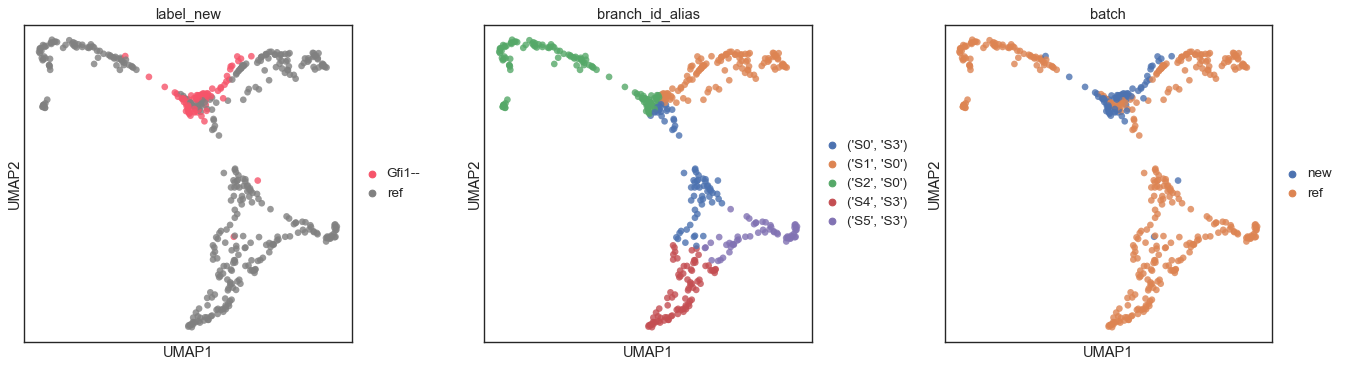

In [35]:
st.plot_visualization_2D(adata_combined_Gfi1_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

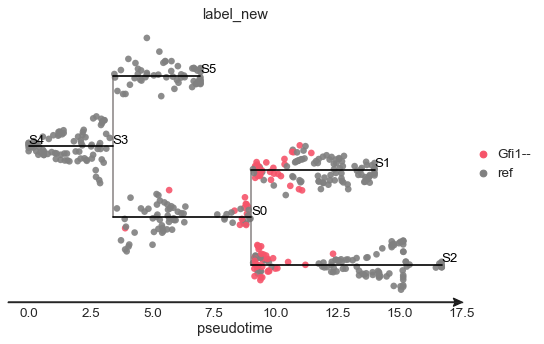

In [36]:
st.plot_stream_sc(adata_combined_Gfi1_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

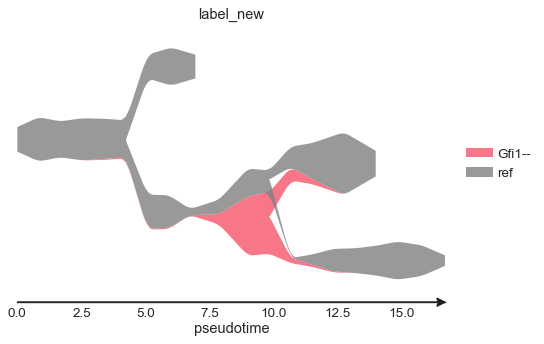

In [37]:
st.plot_stream(adata_combined_Gfi1_Null,root='S4',color=['label_new'])

In [38]:
adata_combined_Irf8_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Irf8--','ref'])].copy()

Importing precomputed umap visualization ...


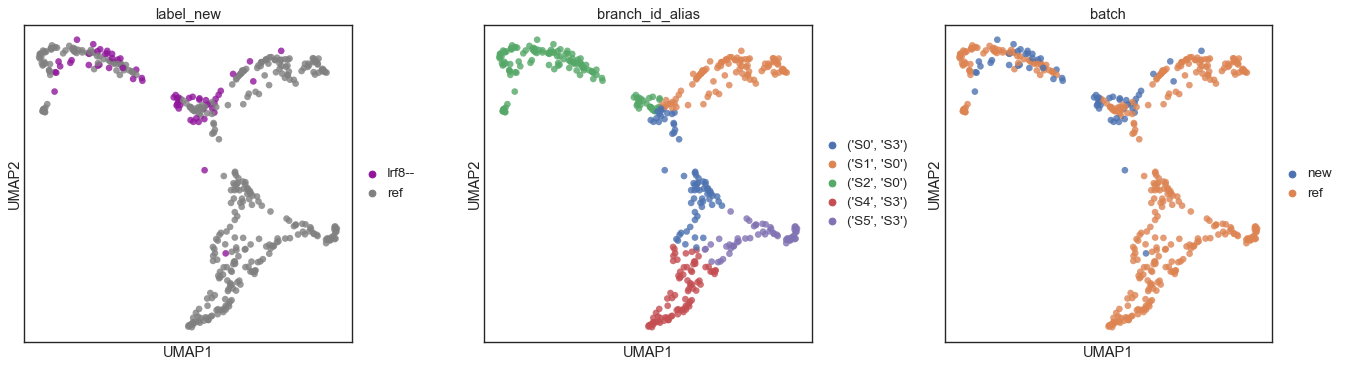

In [39]:
st.plot_visualization_2D(adata_combined_Irf8_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

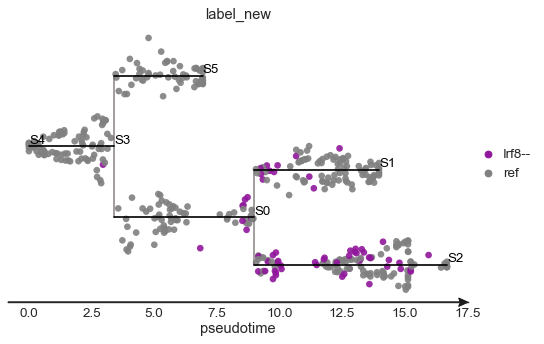

In [40]:
st.plot_stream_sc(adata_combined_Irf8_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

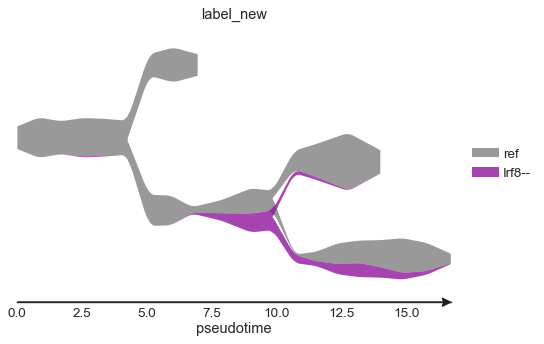

In [41]:
st.plot_stream(adata_combined_Irf8_Null,root='S4',color=['label_new'],dist_scale=0.6,
               fig_legend_order={'label_new':['ref','Irf8--',]})

In [42]:
adata_combined_Gfi1_Irf8_Null = adata_combined[np.isin(adata_combined.obs.label_new,['Gfi1--Irf8--','ref'])].copy()

Importing precomputed umap visualization ...


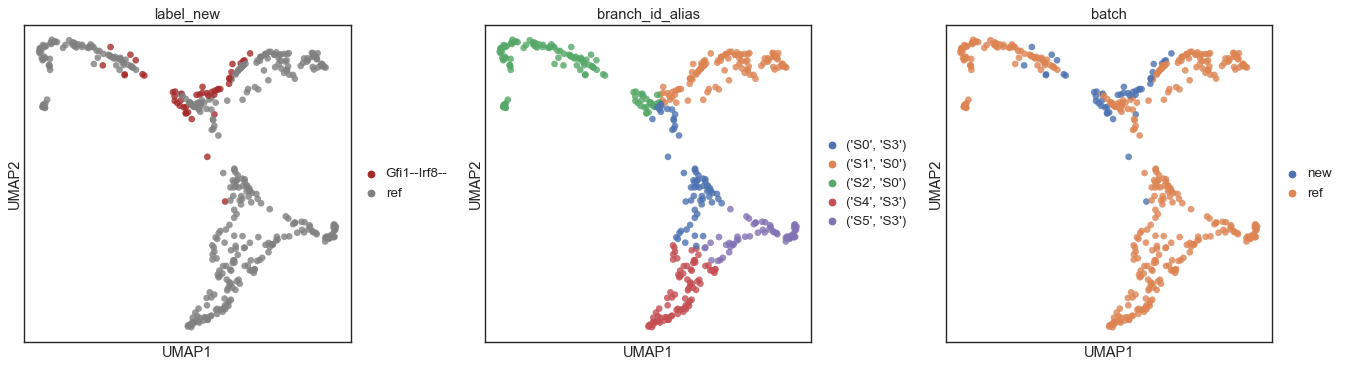

In [43]:
st.plot_visualization_2D(adata_combined_Gfi1_Irf8_Null,n_neighbors=30,color=['label_new','branch_id_alias','batch'],fig_ncol=4)

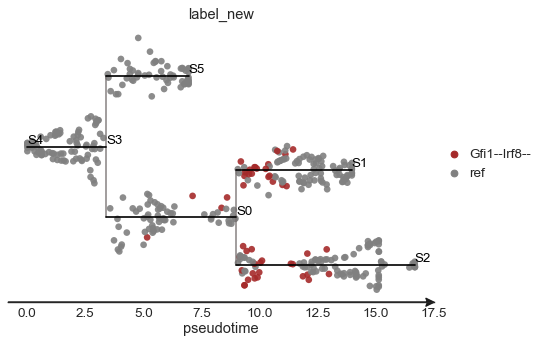

In [44]:
st.plot_stream_sc(adata_combined_Gfi1_Irf8_Null,root='S4',color=['label_new'],
                  dist_scale=0.5,show_graph=True,show_text=True,alpha=0.9)

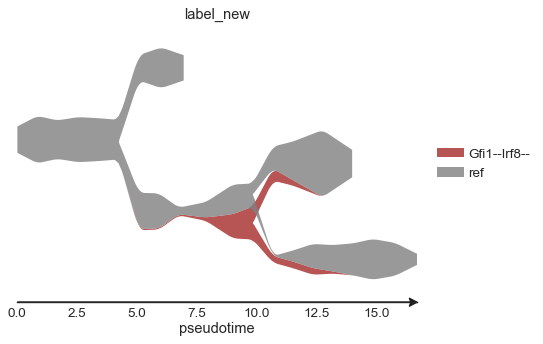

In [45]:
st.plot_stream(adata_combined_Gfi1_Irf8_Null,root='S4',color=['label_new'],dist_scale=0.7)

In [46]:
st.write(adata,file_name='adata.pkl')
st.write(adata_new,file_name='adata_new.pkl')
st.write(adata_combined,file_name='adata_combined.pkl')